# Abalone Case Study

### Introduction

The dataset is about various attributes of Abalone which are used to determine its age. As  cutting the shell through the cone, staining it, and counting the number of rings through a microscope is a time consuming task, other measurements, which are easier to obtain, are used to predict the age. <br><br>
In this problem, we are using machine learning algorithms to  predict the age of Abalone. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. <br><br>

Name / Data Type / Measurement Unit / Description<br>

Sex / nominal / -- / M, F, and I (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
Whole weight / continuous / grams / whole abalone<br>
Shucked weight / continuous / grams / weight of meat<br>
Viscera weight / continuous / grams / gut weight (after bleeding)<br>
Shell weight / continuous / grams / after being dried<br>
Rings / integer / -- / +1.5 gives the age in years. 

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv("AbaloneCaseStudy")

### Exploratory Data Analysis

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


This shows the first five rows of the dataset.

In [4]:
df.shape

(4177, 9)

There are 4177 rows and 9 columns in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We can see that there are no null values.

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


This gives the statistical information of the data.

In [8]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          8 non-null      float64
 1   Diameter        8 non-null      float64
 2   Height          8 non-null      float64
 3   Whole weight    8 non-null      float64
 4   Shucked weight  8 non-null      float64
 5   Viscera weight  8 non-null      float64
 6   Shell weight    8 non-null      float64
 7   Rings           8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


We can see that there is no statistical information of the column Sex as it has categorical variables.

In [9]:
pd.set_option('display.max_rows', None)

In [10]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

This shows the unique values in the column 'Rings'

In [11]:
df['Rings'].value_counts() 

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

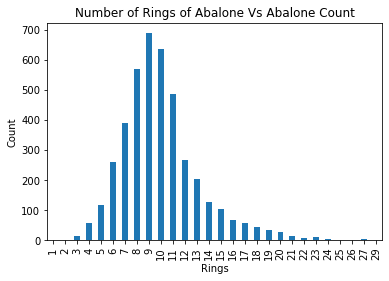

In [12]:
pd.Series(df['Rings']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Rings")
plt.title('Number of Rings of Abalone Vs Abalone Count');

From problem statement and attribute description, let's first compute the target varible of the problem ' Age' and assign it to the dataset.<br>It is given that Age= Rings+1.5

In [13]:
df['Age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

Now, we have dropped the Rings Column and added the Age column of the Abalone.

In [14]:
df.shape

(4177, 9)

We can see that there are 4177 rows and 9 columns.

In [15]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

We can see that the Rings column dropped and Age column is added in its place. Age is of float64 datatype.

In [16]:
# Checking whether we have null or empty data in our dataset
print(df.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64


There are no null values.

In [17]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Age attribute's confidence interval range is from 9 to 12. As it is not starting from zero, it should havepositive skewness.

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

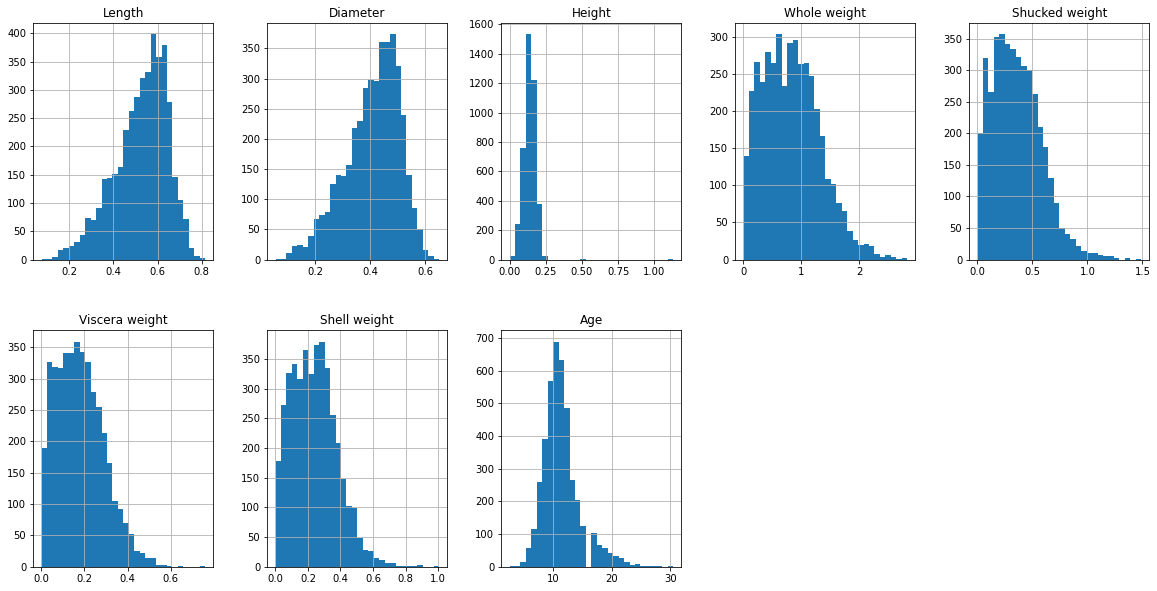

In [18]:
df.hist(figsize=(20,10), grid=True, layout=(2, 5), bins = 30)

Histogram visualisation for each attribute showing what kind of distribution it is.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

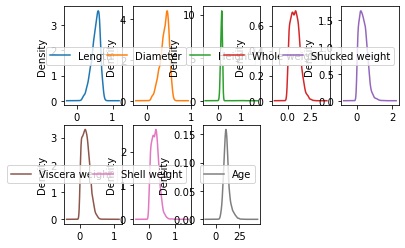

In [19]:
df.plot(kind='density',layout=(2,5),sharex=False,sharey=False,subplots=True,grid=False)

We can see that the Attributes are not normally distributed however close to normality

<AxesSubplot:xlabel='Age', ylabel='Density'>

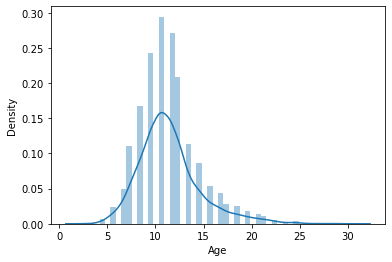

In [20]:
import seaborn as sns
sns.distplot(df['Age'])

Distribution for Age attribute.

<br><br>Checking skewness

In [21]:
df.skew(axis = 0, skipna = True)

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

Height has highest skewness followed by Age and Shucked weight. 

<AxesSubplot:xlabel='Sex', ylabel='count'>

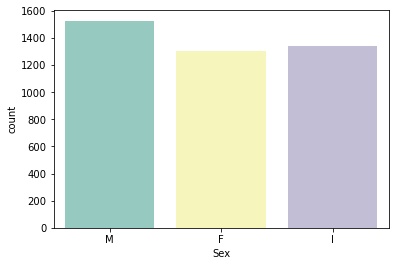

In [22]:
sns.countplot(x = 'Sex', data = df, palette="Set3")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

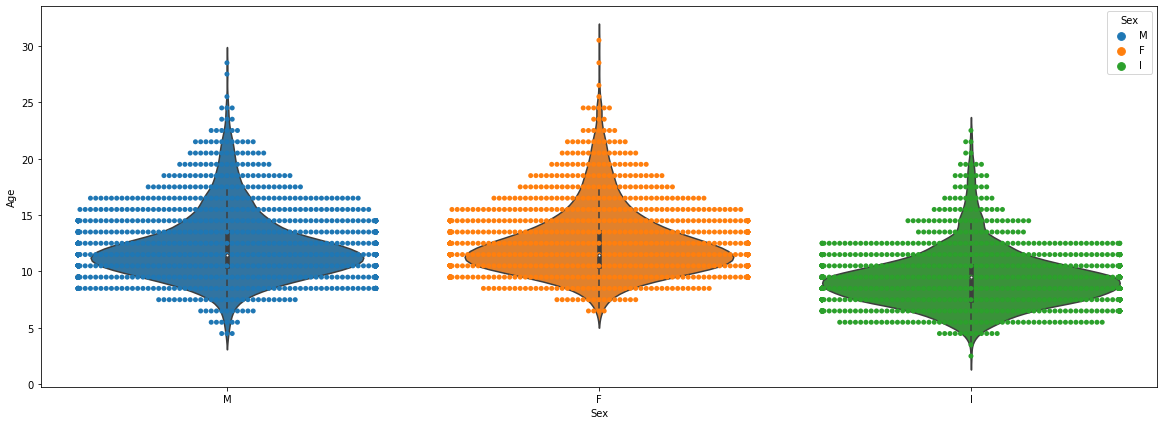

In [23]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)


<br><br>From the above violinplot, we can see that<br>  Female age majority lies in between 8 years to 19 years.<br>  Infant age majority lies in between 6 years to < 10 years.<br>Male age majority lies in between 7.5 years to 19 years.

In [24]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


Attributes are grouped by 'Sex' column.

#### Bivariate Analysis

Bivariate analysis is a vital part of data analysis process. It gives clear picture on how each feature is affected in presence of other features.<br>
It also helps us understand and identify significant features, overcome multi-collinearity effect, inter-dependency and thus, provides insights on hidden data noise pattern.

<Figure size 1728x720 with 0 Axes>

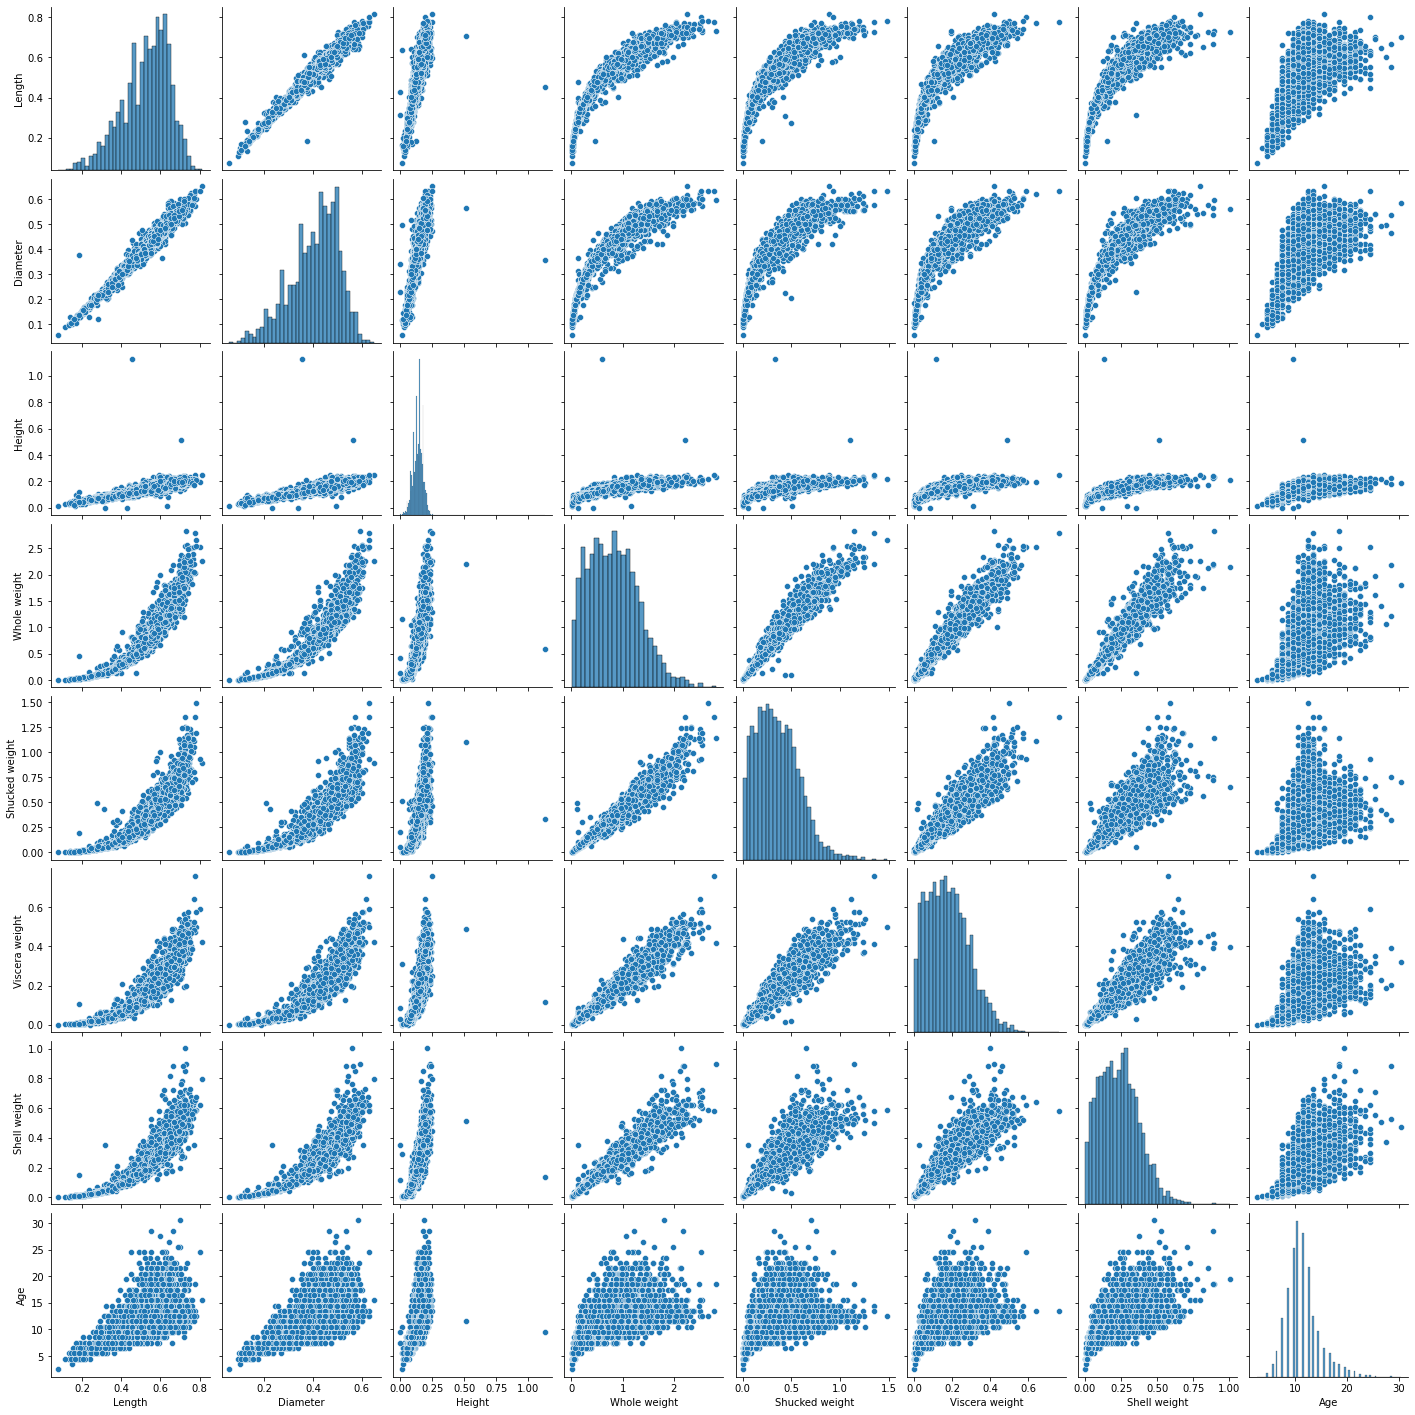

In [25]:
figure = plt.figure(figsize=(24,10))
sns.pairplot(df)
plt.show()

The above pairplot shows how each attribute varies with the other.

Observation :<br>
length is linearly correlated with diameter while there is non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight.

<AxesSubplot:>

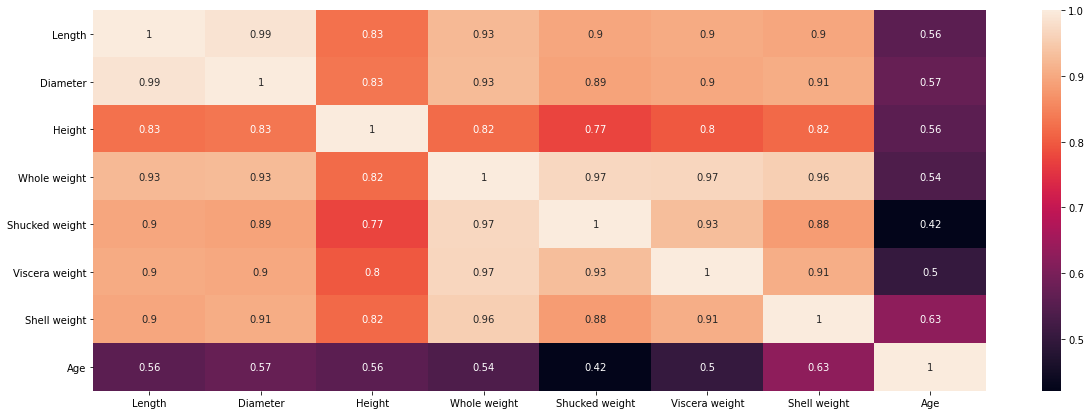

In [26]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

  Observation :<br> Whole Weight is almost linearly varying with all other features except Age.<br>
    Height has least linearity with remaining features.<br>
    Age is most linearly proprtional with Shell Weight followed by Diameter and length.<br>
    Age is least correlated with Shucked Weight.

#### Outliers handlings

In [27]:
df = pd.get_dummies(df)
dummy_data = df.copy()

<AxesSubplot:>

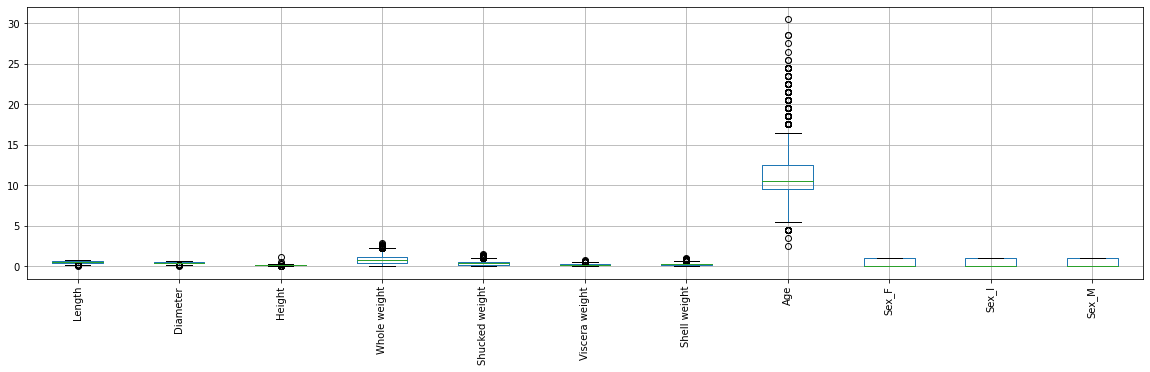

In [28]:
df.boxplot( rot = 90, figsize=(20,5))

<AxesSubplot:xlabel='Length', ylabel='Age'>

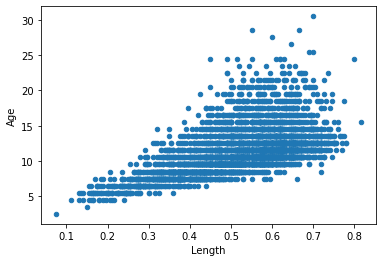

In [29]:
data_plot=pd.concat([dummy_data['Age'],dummy_data['Length']],axis=1)
data_plot.plot.scatter(x='Length',y='Age')

We can see that there are no Outliers for Age output and Length input attributes as per above visualisation plot.

<AxesSubplot:xlabel='Diameter', ylabel='Age'>

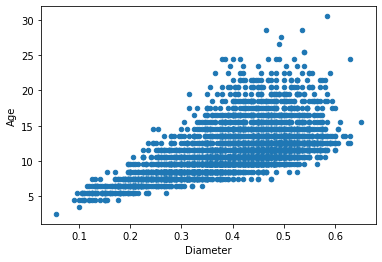

In [30]:
data_plot=pd.concat([dummy_data['Diameter'],dummy_data['Age']],axis=1)
data_plot.plot.scatter(x='Diameter',y='Age')

We can see that there are no Outliers for Age output and Diameter input attributes as per above visualisation plot.

<AxesSubplot:xlabel='Height', ylabel='Age'>

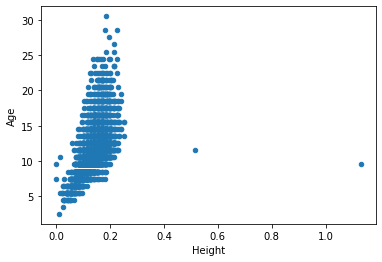

In [31]:
data_plot=pd.concat([dummy_data['Height'],dummy_data['Age']],axis=1)
data_plot.plot.scatter(x='Height',y='Age')

Here we got 2 outlier points in between 0.4 to 1.2 values. This outlier value might affect the performance for our algorithm.<br><br>

So, let's remove these two outlier values.

<AxesSubplot:xlabel='Height', ylabel='Age'>

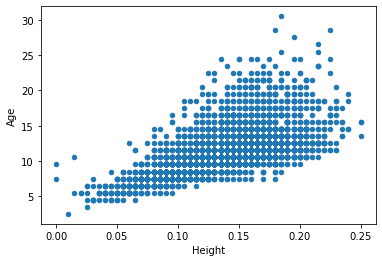

In [32]:
df=df.drop(df[(df['Height']>0.4) & (df['Height']<1.4)].index)
data_plot=pd.concat([df['Height'],df['Age']],axis=1)
data_plot.plot.scatter(x='Height',y='Age')

We can see that the above two outliers are removed.

<AxesSubplot:xlabel='Whole weight', ylabel='Age'>

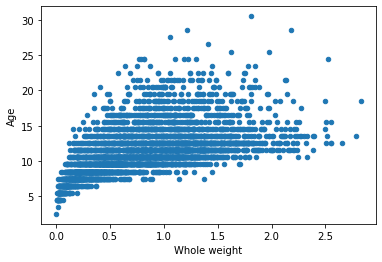

In [33]:
data=pd.concat([dummy_data['Whole weight'],dummy_data['Age']],axis=1)
data.plot.scatter(x='Whole weight',y='Age')

We can see that there are no outliers for Age output and Whole weight input attribute. 

<AxesSubplot:xlabel='Shucked weight', ylabel='Age'>

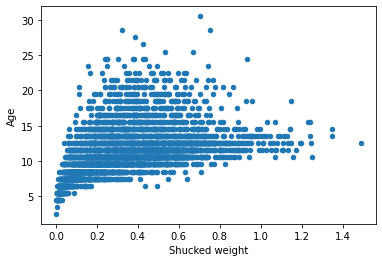

In [34]:
data=pd.concat([dummy_data['Shucked weight'],dummy_data['Age']],axis=1)
data.plot.scatter(x='Shucked weight',y='Age')

As we can see above plot with high value we got less rings, so it was near to outlier so we are removing from 1.2 to 1.6 range values for Age output and Shucked weight input attribute.

<AxesSubplot:xlabel='Shucked weight', ylabel='Age'>

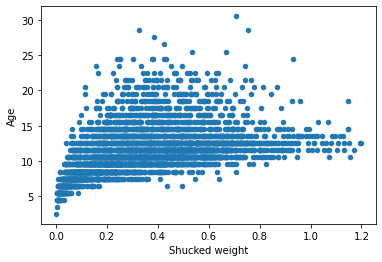

In [35]:
df=df.drop(df[(df['Shucked weight']>1.2)&(df['Shucked weight']<15)].index)

data=pd.concat([df['Shucked weight'],df['Age']],axis=1)
data.plot.scatter(x='Shucked weight',y='Age')

We can see that two outliers are removed.

<AxesSubplot:xlabel='Viscera weight', ylabel='Age'>

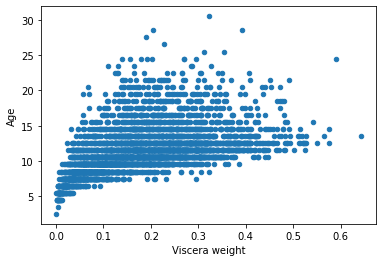

In [36]:
data=pd.concat([df['Viscera weight'],df['Age']],axis=1)
data.plot.scatter(x='Viscera weight',y='Age')

There is one outlier value for Viscera weight input attribute and Age output attributE. So now we are going to remove in between 0.6 to 15 value box.

<AxesSubplot:xlabel='Viscera weight', ylabel='Age'>

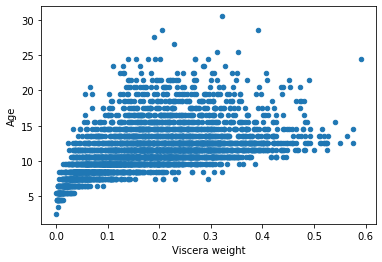

In [37]:
df=df.drop(df[(df['Viscera weight']>0.6)&(df['Viscera weight']<15)].index)

data=pd.concat([df['Viscera weight'],df['Age']],axis=1)
data.plot.scatter(x='Viscera weight',y='Age')

We can see that the outlier is removed.

<AxesSubplot:xlabel='Shell weight', ylabel='Age'>

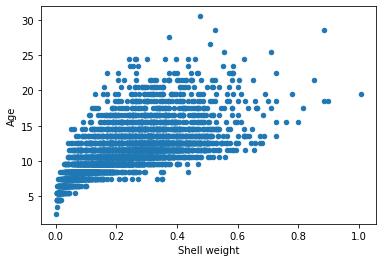

In [38]:
data=pd.concat([df['Shell weight'],df['Age']],axis=1)
data.plot.scatter(x='Shell weight',y='Age')

We are not sure whether those values lies below the threshold 0.9 to 15 values we are going to remove those values.

<AxesSubplot:xlabel='Shell weight', ylabel='Age'>

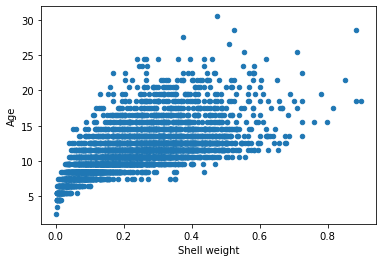

In [39]:
df=df.drop(df[(df['Shell weight']>0.9)&(df['Shell weight']<15)].index)

data=pd.concat([df['Shell weight'],df['Age']],axis=1)
data.plot.scatter(x='Shell weight',y='Age')

We can see that the outliers are removed.

### Preprocessing, Modeling, Evaluation

In [56]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

There is no need to apply cleaning to our dataset. Because we dont have any error or empty or null values.

In [51]:
X = df.drop('Age', axis=1)
y = df['Age'].values

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Model Training

In [73]:
lSVR=LinearSVR()
lSVR.fit(x_train,y_train)

lr= LinearRegression()
lr.fit(x_train,y_train)

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [75]:
print("Test Accuracy of LinearSVR: {}%".format(round(lSVR.score(x_test,y_test)*100,2)))
print("Test Accuracy of LinearRegression: {}%".format(round(lr.score(x_test,y_test)*100,2)))
print("Test Accuracy of DecisionTreeRegressor: {}%".format(round(dt.score(x_test,y_test)*100,2)))
print("Test Accuracy of RandomForestRegressor: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy of LinearSVR: 53.75%
Test Accuracy of LinearRegression: 56.56%
Test Accuracy of DecisionTreeRegressor: 22.32%
Test Accuracy of RandomForestRegressor: 57.3%


In [57]:
classifiers = [
    LinearSVR(),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

In [67]:
from sklearn.model_selection import cross_val_score

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*40)
    print(name)
    
    scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    
    print('****Results****')
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std deviation: ", scores.std())
    
print("="*40)

LinearSVR
****Results****
Scores:  [-4.58215415 -5.11643569 -6.41533044 -5.8446695  -4.57319646 -4.73554745
 -4.48171811 -6.412224   -5.05963483 -5.86070429]
Mean:  -5.308161493145283
Std deviation:  0.7221219801777566
LinearRegression
****Results****
Scores:  [-4.22331472 -4.64419307 -5.38319842 -4.95314089 -3.99449216 -4.19632584
 -3.9623954  -5.96724662 -4.61887301 -5.2645537 ]
Mean:  -4.72077338314214
Std deviation:  0.6311556306234072
DecisionTreeRegressor
****Results****
Scores:  [ -9.20447284  -8.5942492   -9.44089457  -8.76602564  -8.23717949
  -7.93269231  -8.56089744 -10.52884615  -7.70192308  -8.58012821]
Mean:  -8.754730892111084
Std deviation:  0.7724327811536873
RandomForestRegressor
****Results****
Scores:  [-4.52014441 -4.97659936 -4.98732077 -4.7130516  -4.23317853 -4.29715577
 -4.01428846 -5.77509904 -4.48835192 -5.66293013]
Mean:  -4.766811998545917
Std deviation:  0.5590361111717581


It looks like RandomForestRegressor did best out of the box so now to find the best hyperparameters for it.

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=5, scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [77]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [78]:
best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

2.249753191363802

This is our final RMSE for this task, which is a little better than what other users are getting which is good!

##### Predictions

In [84]:
OutputDF=pd.DataFrame({'Actual Quality':y_test,'Predicted Quality':y_pred})
OutputDF.head()

,Actual Quality,Predicted Quality
0,12.5,15.266667
1,9.5,8.133333
2,11.5,11.366667
3,14.5,14.200000
4,10.5,11.033333


#### Saving the model

In [85]:
import joblib
joblib.dump(OutputDF, "Abalone_Case_Study.pkl")

['Abalone_Case_Study.pkl']